## **CAT VS DOG Image Classification Project**

In [1]:
# Importing all necessary packages
import os
import sys
from matplotlib import pyplot
from numpy.random import seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from matplotlib import image
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras import optimizers

In [3]:
from google.colab import drive
drive.mount('/content/drive') # connecting to google drive

Mounted at /content/drive


The aim of the project is to build an image classifier that can classify cats and dogs from the given set of images. The dataset was obtained from Kaggle website. It contains 1002 images for traning and 100 images for testing the classifier. Training data was loaded one by one using imread() from opencv package. As each image will be having different dimensions, it cannit be used as such to build a machine learning model. Hence all images were resized into (350 * 350) height and width. As the images are color images the real shape if the image will be (350,350,3) where 3 refers to the color channels Red, Green, Blue. Computer sees each image as a set of pixel values. An image will be stored as a 3D array of size 350 * 350 * 3 containing pixel values. Each pixel value is between 0-255. Here depth of the matrix will be 3 attributing to the color spectrum.

>


To build a classical machine learning model, the 3D array is flattened into 1D array using flatten(). The name 'Dog' or 'Cat' is searched from the image name and a target class label is given as 1 for 'Dog' and 0 for 'Cat'. Pixel information of an image along with its class value is appendend into a list making it a list of lists to aid the model building process.Also, a dataframe is created containing image titles and class labels. This is further used for exploratory data analysis and data processing for neural networks. Finally some sample images from the traning set are shown as output in the below function.




In [28]:
def data_load():
    
    src_dir='/content/drive/My Drive/ML_Assignment/Project2_files/data/train/' 
    image_data=[]
    category=[]
    img_size=350
    filelist=os.listdir(src_dir)
    for img in filelist:
        
        imgpath=os.path.join(src_dir,img)
        img_data=cv2.imread(imgpath) 
        img_data = cv2.resize(img_data, (img_size, img_size)) # resizing image
        #norm_image = cv2.normalize(img_data, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        img_flat=np.array(img_data).flatten() #flattening to 1D
      
        class_type = img.split('.')[0] # getting the name cat or dog
        if(class_type == 'dog'):
            class_val=1 # setting class value as 1 for Dog
            category.append('Dog')
        else:
            class_val=0 # setting class value as 0 for Cat
            category.append('Cat')

        image_data.append([img_flat,class_val]) # making each image values and its class into a list. final list will be a list of lists. This is used as the source for classical machine learining
      
    df = pd.DataFrame({'Name' : filelist , 'Category' : category})  # creating data frame with image name and class. This data frame is used for loading images in neural networks
    df=shuffle(df,random_state=1)
    df.reset_index(drop=True, inplace=True) 
    print("-----Dataframe Created-----")
    print(df.head())

    pick_in=open('data_sklearn','wb') # saving the list of lists in files so that it need not be re run
    pickle.dump(image_data,pick_in)
    pick_in.close()

    print("-----Displaying some of the training images-----")
    for i in range(5):
        sample = df.iloc[i,0] # getting image name
        image = tf.keras.preprocessing.image.load_img(src_dir + sample)
        plt.imshow(image)
        plt.title('Dog' if df.iloc[i,1] == 'Dog' else 'Cat')
        plt.show()
    return df



-----Dataframe Created-----
          Name Category
0  cat.275.jpg      Cat
1  dog.129.jpg      Dog
2  dog.335.jpg      Dog
3  dog.348.jpg      Dog
4  cat.374.jpg      Cat
-----Displaying some of the training images-----


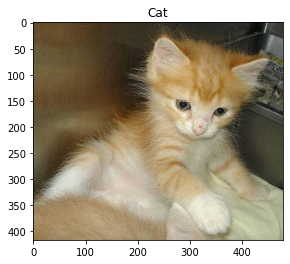

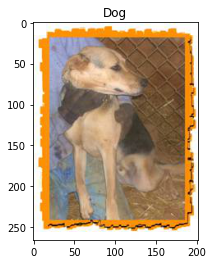

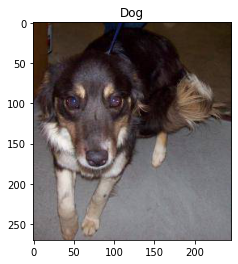

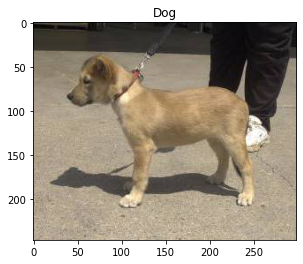

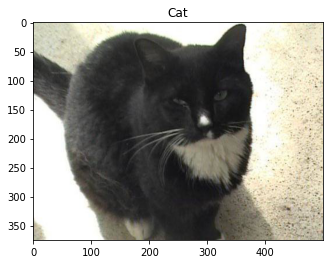

In [29]:
df=data_load()

# **Classical Machine Learning**

Flattened 1D array along with the class labels are read into two separate lists - features and labels. These are converted from list to numpy arrays for proceesing. The features and labels are split for training and testing by using the train_test_split function of sklearn package. The test size was specified as 0.1. Hence 90 percent of the data available will be used for traning the model and the rest for validation. Each pixel value is a color code ranging between 0-255 for RGB channels. Using these values as such for machine learning would become computationally intensive. Hence procedures such as normalization or standardisation is conducted. Here a simple normalization is done. Each value of the feature array is divided by 255 so that all values will range between 0 and 1. Shape of the feature array is (number of images, width * height * channels). Shape of label array is (number of images,)

In [31]:
def data_preparation():
    
    pick_in=open('data_sklearn','rb') # loading list of lists
    data=pickle.load(pick_in)
    pick_in.close()

    features=[]
    labels=[]
  
    random.Random(1).shuffle(data)

    for feature,label in data: #unpacking list of lists
        
        features.append(feature) # first value in each list would be image feature. This is given to features list
        labels.append(label)     # secong value in each list would be image class. This is given to labels list
        
    features_array = np.asarray(features, dtype=np.float32) # converting list  to numpy array for processing
    labels_array = np.asarray(labels, dtype=np.float32)

    xtrain,xtest,ytrain,ytest= train_test_split(features_array,labels_array,test_size=0.1,random_state=1) # splitting to train and test
    print("------Before Normalization-------")
    print(xtrain[0])

    xtrain = xtrain/255 # Normalizing
    xtest = xtest/255
    print("-----After Normalization------")
    print(xtrain[0])
    print("-----Shape of xtrain-----")
    print(xtrain.shape)
    print("-----Shape of xtest-----")
    print(xtest.shape)
    print("-----Shape of ytrain-----")
    print(ytrain.shape)
    print("-----Shape of ytest-----")
    print(ytest.shape)

    return xtrain,xtest,ytrain,ytest

In [32]:
xtrain,xtest,ytrain,ytest = data_preparation()

------Before Normalization-------
[69. 79. 73. ... 15. 29. 27.]
-----After Normalization------
[0.27058825 0.30980393 0.28627452 ... 0.05882353 0.11372549 0.10588235]
-----Shape of xtrain-----
(901, 367500)
-----Shape of xtest-----
(101, 367500)
-----Shape of ytrain-----
(901,)
-----Shape of ytest-----
(101,)


Support Vector Machine classifier was created with the data. Pickle() was used to save the model and reload so that memory is not used up incase to run the code multiple times. The separation plane is defoned by the kernel specified. Hyper parameter tuing was done by changing Kernel and  the C value (margin of hyper plane/ misclassification rate). On running with a polynomial kernel, the model produced a validation accuracy of 44%. Radial basis function kernel gave an accuracy of 57.4% while the linear kernel always gave a better validation accuracy of around 58.4%. Hence it was concluded that SVM classifier with a linear kernel is a better classifier.

In [ ]:
def model_svm_run(xtrain,xtest,ytrain,ytest):
    
    model_svm = SVC(C=1,kernel='linear')
    model_svm.fit(xtrain,ytrain)
  

    pick_in=open('svm_model','wb')
    pickle.dump(model_svm,pick_in)
    pick_in.close()

  # The above block of code can be commented if running second time, so that the model need to be trained again

    pick_in=open('svm_model','rb') # opening trained model that is saved
    model_svm=pickle.load(pick_in)
    pick_in.close()
    y_pred=model_svm.predict(xtest) # predicting target classes for test images
      
  #calculating accuracy using predictions and real testing results
    print('Model Test accuracy score: {0:0.2f}'.format(accuracy_score(ytest,y_pred)*100)) 


In [ ]:
model_svm_run(xtrain,xtest,ytrain,ytest) 

Model Test accuracy score: 58.42


The data frame containing information of images was split into train and validation data frames which could in turn help in loading images to build neural network model in an easier way. Some exploratory analysis was also conducted here.

In [5]:
def data_exploration(df):
    print("Total Counts")
    print(df['Category'].value_counts())
    df['Category'].value_counts().plot(kind = 'bar')
    train_df, validate_df = train_test_split(df, test_size = 0.1, random_state = 42,shuffle=True) # splitting to train and validation data

    train_df = train_df.reset_index(drop=True)

    validate_df = validate_df.reset_index(drop=True)
    print("----Training Dataframe-----")
    print(train_df.head())
  
    print("----Validation Dataframe-----")
    print(validate_df.head())
  
    print('Train Images shape is        : ',train_df.shape)
    print('Validation  Images  shape is : ',validate_df.shape)

    return train_df,validate_df

Total Counts
Cat    501
Dog    501
Name: Category, dtype: int64
----Training Dataframe-----
          Name Category
0   dog.50.jpg      Dog
1  dog.146.jpg      Dog
2  cat.495.jpg      Cat
3  dog.135.jpg      Dog
4  dog.264.jpg      Dog
----Validation Dataframe-----
          Name Category
0  cat.200.jpg      Cat
1  cat.262.jpg      Cat
2  dog.151.jpg      Dog
3  cat.323.jpg      Cat
4  cat.472.jpg      Cat
Train Images shape is        :  (901, 2)
Validation  Images  shape is :  (101, 2)


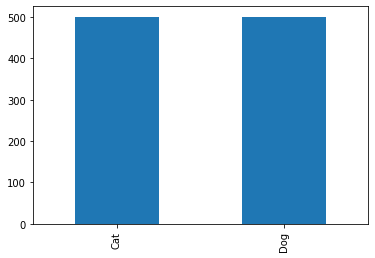

In [6]:
train_df,validate_df = data_exploration(df)

# **NeuralNetworks**

Deep learning models using convolution neural netwroks are often more employed for image classification nowadays.Keras and Tensorflow is the most commonly used in python to implement neural network models. Keras is a deep learning API written in python and it runs on top of a machine learning platofrm called tensor flow.To load data to train and validate a neural network architecture, Keras provides ImageDataGenerator. ImageDataGenerator class gives easy way to augment images. Image augmentation is a way of applying different transformations to original images such as shifting, rotation, flipping etc which results in multiple transformed copies of the same image. After each transformation, a copy of the original image is generated. Main advantage is that it generates augmented images while the model is traning thus making it more memory efficient. It only returns transformed images and it make sure that the model receives new variations of images at each epoch. Here to implemment a base algorithm, only stadardization of images is performed on traning and validation data.

>

flow_from_dataframe is a variation of flow_from_directory function in keras. Since both 'cat' and 'dog' images are present in the same folder flow_from_dataframe is more easier to use. It essentially checks for file names in either train or validation dataframe and picks images from the directory specified according to the file name. Shuffling of images and resizing of images to specific value can be done in this function. Here class mode is given as 'binary' as there is only two target classes present. For multi class classification 'categorical' is given.

> 
Training of a neural network happens in two main sections- Forward propagation through the network and backward propagation to update weights and minimise losses. In forward prooagstion, each neuron in a layer has its inputs (X) multipled by weights (W) and then a bias (B) is added to it. ((W * X ) + B).Output of this is given to an activation function which creates non linearity.This non linearity helps neural networks to detect complex patterns. Finally the output of the model is compared with the actual output to calculate loss. Once the losses are found, backward propagation starts. Gradient descend is used to update weights in each of the neurons to minimise losses.Chain rule of differenciation is used in the weight update by gradient descend. This process is continued till the losses are minimised to the optimum level.Training a neural network with all the training data for one cycle (forward and backward propagation) is called an epoch. Batch size is the number of samples that will be passed through to the network at one time. Batch size is specified so that only a small portion of data passes through network at a time. An epoch is completed when all the batches are finished. Several epochs of training is done on a neural network. A batch size of 8 gives an input image shape of (8, 350, 350, 3)






In [7]:
img_wid = 350
img_height = 350
img_channel = 3 
train_imgdatagen = ImageDataGenerator(rescale = 1./255) # Normalizing training and validation data using ImageDataGenerator
valid_imgdatagen = ImageDataGenerator(rescale = 1./255)
train_generator_m1 = train_imgdatagen.flow_from_dataframe(
                    train_df,
                    "/content/drive/My Drive/ML_Assignment/Project2_files/data/train/", #Path to the directory which contains all the images
                    x_col='Name', #column which contains the filenames of the images
                    y_col='Category', # Target class column
                    target_size = (img_wid, img_height), # resize image to 350x350
                    batch_size = 8,
                    shuffle= True, #shuffle the order of the image that is being yielded
                    seed=42,   # to maintain the order
                    class_mode = 'binary' # only two classes to predict
                  )
validation_generator_m1 = valid_imgdatagen.flow_from_dataframe(
                    validate_df,
                    "/content/drive/My Drive/ML_Assignment/Project2_files/data/train/",                   
                    x_col='Name',  
                    y_col='Category',                 
                    target_size = (img_wid, img_height), # resize image to 150x150               
                    batch_size = 8,
                    shuffle=True,
                    seed=42,
                    class_mode = 'binary'
                  )
step_size_train=train_generator_m1.n//train_generator_m1.batch_size # to know how many samples to be drawn from generator before declaring than an epoch is over. length(training data)// Batch size
step_size_valid=validation_generator_m1.n//validation_generator_m1.batch_size # to know the number of data points to be used for validation at a time. length(validation data)// Batch size

for v_img , v_label in train_generator_m1 : # check for image and label shape in traning data
    
    print('image shape ',v_img.shape)
    print('label  shape ',v_label.shape)
    break 

Found 901 validated image filenames belonging to 2 classes.
Found 101 validated image filenames belonging to 2 classes.
image shape  (8, 350, 350, 3)
label  shape  (8,)


## **Convolutional Neural Networks (CNN)**

Convolution nueral networks or Convnets are largely used for computer vision and image classification problems. Usually the convnets are stacked first and the output is given to dense (fully connected) neural network. A convnet takes as input tensors of shape (image_height, image_width,
image_channels) to the first layer (3D). First two are the spatial axis and the third one is the channel axis. For a color image number of image channels will be 3.The main difference between densely connceted lsyer and convnet layer is that convolution layers learn local patterns first whereas dense layers figure out global patterns. In case of images, patterns in small 2D windows are learned by convnets first. If a convnet learns a certain pattern in a part of the picture, it can recognize it anywhere, making it more data efficient when processing images. Also, A first convolution layer will learn small local patterns such as edges, a subsequent convolution layer will learn larger patterns made of the features of the first layers, and so on. Thus more complexities are learned in visualizations are learned efficiently.

> 
Traditionally convolution is an operation performed on two functions to create a third function. In image processing convolution is used to transform images by applying a kernel/filter over each pixel of input image. Kernel is essentially a matirx whose size and values determines the transformation effect of convolution process. The steps of a Convolution process is-First, kernel is placed on top of an image postion (say top right corner) such that kernel values are on the top of pixel vlaues of the image. Then,  multiplies each value of the Kernel with the corresponding pixels it is over. Finally, sums the resulting multiplied values and the resultant single value becomes the first value (centre pixel value) of the output/feature map( eg:at top right corner) This process is repeated across the entire image. The way in which a kernel moves across the image can be define by stride.  The distance between two successive windows of a kernel is a parameter of the convolution, called its stride. Default is 1, but its possible to have other strided convolutions. Using stride 3 means the width and height of the feature map are downsampled by a factor of 3. These down samplings can sometimes come in handy. An important point is that, it is not one kernel that moves across the image. There are several ones. Each one will pick a different pattern about the image. As more convolution layers are stacked the number filters/kernels in each layer is increased ususally. Thus depth of the feature map gets increased as the layers increases while height and width decreases.

> 

**Maxpooling**: The role of max pooling is to aggressively downsample feature maps. Max pooling is done by first placing a window at the output of a convolution layer/feature map. Then maximum value occuring in this window is extrated as output. This window is shifted across the feature map to get a down sampled one. Finally the output of final convolution layer is flattedned into 1D array and is given to a fully connected neural network. At this point the number of features would become so high that it leads to overfitting. Hence down sampling process is done prior to this. The output of dense neural network is given to an output function. Usually sigmoid or softmax.

> 
**Padding**: When a 5 * 5 feature map (25 tiles) is convoluted with a 3 * 3 kernel, there are only 9 tiles that can be properly centered with this (3,3) window. Hence the output feature map shrinks a little. In order to get an output feature map with the same spatial dimensions as the input, padding is used. Padding is done by adding an appropriate number of rows and columns on each side of the input feature map so that kernel windows can be placed centered around every input tile. Padding can be done. padded rows and column can be set with values such as zeroes or ones etc. Padding to an image processed by a CNN allows for more accurate analysis of images. 






**Base Model** : First a base model is built to process the images. models.sequential() in Keras allows to build the neural network architecture by stacking different layers. Layers are added by specifying conv2D(). Input shape of the image is given as (350, 350, 3). The number of filters specified is 32. That is 32 filters are compputed over the input. This becomes the number of channels of the output feature map of conv layer. The size of kernel is specified as (3,3). These are the typical specifications given in conv2D. The activation function specified is 'relu', relu(x) if x>0 is x while relu(x) if x<=0 is 0. The output of convolution is given to activation function to create non linearity. That is convolution values which are less than one will be switched off (zero) by relu creating non linearity.

> 

In the base model defined below, padding is given as 'same'so that input is padded to get the same sized output. Defalut parameter is 'valid' which has no padding. Due to padding output shape of conv2D obtained is (None, 350, 350, 32) which us same as input. The number of parameters to be tuned was found to be 896. number_parameters = output_channels * (input_channels * kernel_height * kernel_width + Bias). ie number_parameters = 32(3 * 3 * 3 + 1) = 896. This output is given to a maxpooling window of size (2,2) which decreases the size of its output by two fold. Hence output becomes (None, 175, 175, 32) . Width and height is reduced by half. The output of convnet is flattedned to 1D array by uisng Flatten(). The shape becomes (None, 980000) which is (None, 175 * 175 * 32). This is gven as input to a dense layer of 128 neurons each with an activation function of 'relu'. Here (W*X + B) happens in each neoron. X = 98000 which is the input from flattened 1D array. W = 128, each of the 128 neurons will have a weight associated with it. 128 * 980000 = 125440000 parameters. Then 128 bias (B) parameters are added to it one for each neoron. Thus the total number of paramters become 125440128.

>

At the final layer there should be only one neuron which outputs the probability of the image being 'cat' or 'dog'. Usually the output of a neural network will have a sigmoid or softmax activation function inside the neuron outputting  probabilities. Sigmoid Function is mostly in the range of values between 0 and 1 or -1 and 1. Softmax Function takes numbers as inputs, and normalizes them into a probability distribution proportional to the exponentials of the input numbers. Here since it is a binary classification problem sigmoid is used as activation function. For multiclass classification problems generally softmax is used. The number of parameters at the output becomes (W * X + B) = (1 * 128 + 1) = 129. All the parameters obtained are tuned to minimize losses at each epoch




In [ ]:
def base_model(img_wid,img_height,img_channel):
    
    model_base = models.Sequential()
    model_base.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(img_wid,img_height,img_channel)))
    model_base.add(layers.MaxPooling2D((2, 2)))
    model_base.add(layers.Flatten())
    model_base.add(layers.Dense(128, activation='relu'))
    model_base.add(layers.Dense(1, activation='sigmoid'))

    return model_base

The below function plots cross entropy loss and accuracy for both training and validation data after each epoch. The history of the model created contains loss and accuracy values at each epoch. This is useful in understadning model performance. Ideally losses should decrease and accuracies has to increase as the number of epochs increases.

In [8]:
def summarize_diagnostics(hist):

    # plot loss
    plt.subplot(211) # creating sub plots
    plt.title('Cross Entropy Loss')
    plt.plot(hist.history['loss'], color='blue', label='loss') # plotting traning loss values from history list
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss') # plotting validation loss values from history list
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right') # setting legend position
    plt.show()

    #plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(hist.history['acc'], label='accuracy') #plotting training accuracy values
    plt.plot(hist.history['val_acc'], label = 'val_accuracy')#plotting validation accuaracy values
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right') #setting legend location
    plt.show()

The below function defined trains the model and validates it. First model.compile() is used to compile the model created. First loss function is defined to minimize error. There are several loss functions present according to regression or classification problems. Cross-entropy is the default loss function for binary classification problems. Mathematically it is the most preferred one. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for output class 1. Since the problem definition here is binary classification, binary cross entropy is used as loss function. Next, right optimizer has to be specified which calculates the weight update using gradient descend algorithm. Optimizers does the tuning of parameters of the model. Optimizers shape the model into the most accurate form by changing weights. Tensorflow & Keras provides several optimizer classes each implemeting different algorithm. Gradient descend is used in most popular optimizer algorithms like  Adagrad, RMSprop, and Adam. The RMSprop is similar to the gradient descent algorithm with momentum. It limits the oscillations in the vertical direction for gradient descend. RMSprop is the most preferred optmizer for binary classification probelm and hence it is used here. It is recommended to leave the parameters of this optimizer as default except the learning rate whicg can be tweaked. Here learning rate  (lr) is specified as a very small value so that gradient descend happens in small steps and thus the gradient does not get stcuk in local minima and instead find the actual global mimimum to optimize losses. Accuracy metric is set as preferred on to compile the model as the accuracy of prediction is of interest here.

Fit() is used to fit data from the ImageDatagenerator. This function gets a python generator as input contaning input features and targets. Beacuse the data is generated endlessly the model needs to know how many samples to be drawn from generator before declaring than an epoch is over. This is specified in steps_per_epoch parameter. It is given as length(training data)// Batch size. This will use all of the data points, one batch size at a time. Batch size here is specified as 8 (small) so that there occurs less memory problems and to not get stck in local minima. There are 901 traning data points and  hence steps_per_epoch will be around 112. Hence as a single epoch gets completed about 112 data points will be fitted. By 10 epochs almost all data points will get fitted. Increasing epochs above that may lead to overfitting. Also in Fit() validation data is provided and the number of data points to be used for validation at a time is specified by validation_steps parameter. Fit() method outputs training and validation accuracy for each epoch according to the weights adjusted. Accuracy is the output generated when Fit() runs as it is mentioned in metrics parameter.Finally the number of epochs to be done is also specified in Fit(). Evaluate() evaluates the fitted function with validation data and outputs validation accuracy with the optimum weights being kept constant for the entire data.



In [9]:
def model_train_validate(model,train,valid,steps_train,steps_valid,epoch):
    
    model.compile(loss = 'binary_crossentropy',optimizer= optimizers.RMSprop(learning_rate = 1e-5), metrics =['acc'])
    history = model.fit(train,
                    steps_per_epoch=steps_train,
                    validation_data=valid,
                    validation_steps=steps_valid,
                    epochs=epoch) 
    _, acc = model.evaluate(valid, steps=len(valid), verbose=0)
    print('> %.3f' % (acc * 100.0)) 
    
    #calling function to display graphs for loss and accuracy
    summarize_diagnostics(history)

In [ ]:
model_base = base_model(img_wid,img_height,img_channel) # creating base model
model_base.summary() # creating summary of model. summary of the model gives output shape and number of parameters after each layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 350, 350, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 175, 175, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 980000)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               125440128 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 125,441,153
Trainable params: 125,441,153
Non-trainable params: 0
________________________________________

The model training for base model was repeated several times. It yielded an accuracy of around 60% with 10 epochs. It was also observed that validation accuracy increased slightly by epoch 6 and started coming down. Also it was observed that alhtough training loss was minimized, the validation loss fluctuates and starts to increase.

Epoch 1/10
112/112 [==============================] - 19s 166ms/step - loss: 0.9345 - acc: 0.5095 - val_loss: 1.0364 - val_acc: 0.5000
Epoch 2/10
112/112 [==============================] - 18s 164ms/step - loss: 0.6965 - acc: 0.5801 - val_loss: 0.6695 - val_acc: 0.5833
Epoch 3/10
112/112 [==============================] - 20s 176ms/step - loss: 0.6751 - acc: 0.5767 - val_loss: 0.8218 - val_acc: 0.5000
Epoch 4/10
112/112 [==============================] - 21s 188ms/step - loss: 0.6551 - acc: 0.6249 - val_loss: 0.6981 - val_acc: 0.5521
Epoch 5/10
112/112 [==============================] - 19s 168ms/step - loss: 0.6540 - acc: 0.6170 - val_loss: 0.7017 - val_acc: 0.6042
Epoch 6/10
112/112 [==============================] - 18s 162ms/step - loss: 0.6482 - acc: 0.6260 - val_loss: 0.6573 - val_acc: 0.6146
Epoch 7/10
112/112 [==============================] - 19s 172ms/step - loss: 0.6123 - acc: 0.6753 - val_loss: 0.6716 - val_acc: 0.6250
Epoch 8/10
112/112 [==============================] - 1

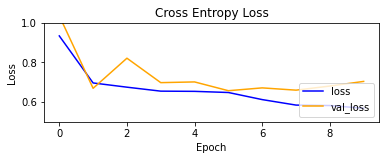

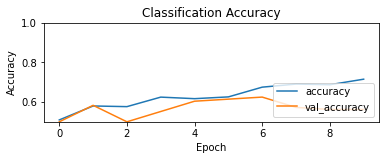

In [ ]:
epoch=10
model_train_validate(model_base,train_generator_m1,validation_generator_m1,step_size_train,step_size_valid,epoch) # model train and validation

# **Additional Models**

Two more neural ntework architectures with deeper layers were created to learn more complex pattersn to produce better results. Second model have a more deeper architecture. There is an additional convolution layer of 256 filters in second model. To minimize overfitting regularization techniques such as BatchNormalization() is applied after certain layers in second model.It applies a transformation to manintain the mean output close to 0 and standard deviation of 1. Alternatively a technique called Dropout can be used. By using Dropout, certain neurons are switched off so that the model does not learn too much from parameters. Dropout(0.5) means 50% of neurons are  switched off. 

In [10]:
def create_first_model(img_wid,img_height,img_channel):
    
    model_one = Sequential()   # Adding Layers to create a convolutional mask/kernel that is wind with layers input which helps produce a tensor of outputs  
    # Layer 1
    model_one.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding='same', input_shape = (img_wid,img_height,img_channel))) 
    model_one.add(MaxPooling2D((2,2)))
    # Layer 2
    model_one.add(Conv2D(64, (3,3),  padding='same',activation = 'relu'))
    model_one.add(MaxPooling2D((2,2)))
    # Layer 3
    model_one.add(Conv2D(128, (3,3),  padding='same',activation = 'relu'))
    model_one.add(MaxPooling2D((2,2)))       
    # Layer 4
    model_one.add(Conv2D(128, (3,3),  padding='same',activation = 'relu'))
    model_one.add(MaxPooling2D((2,2)))
    model_one.add(Flatten())              
    model_one.add(Dense(512, activation = 'relu'))
    model_one.add(Dense(1, activation = 'sigmoid'))
                
    return model_one

def create_second_model(img_wid,img_height,img_channel):
  
    model_two = Sequential()
    # Adding Layers to create a convolutional mask/kernel that is wind with layers input which helps produce a tensor of outputs
    # Layer 1
    model_two.add(Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape = (img_wid,img_height,img_channel)))
    model_two.add(MaxPooling2D((2,2)))
    # Layer 2
    model_two.add(Conv2D(64, (3,3),  padding='same', activation = 'relu'))
    model_two.add(MaxPooling2D((2,2)))
    # Layer 3
    model_two.add(Conv2D(128, (3,3),  padding='same', activation = 'relu'))
    model_two.add(MaxPooling2D((2,2)))
  
    # Layer 4
    model_two.add(Conv2D(128, (3,3),  padding='same', activation = 'relu'))
    model_two.add(MaxPooling2D((2,2)))
    model_two.add(BatchNormalization())
    #layer5
    model_two.add(Conv2D(256, (3,3),  padding='same', activation = 'relu'))
    model_two.add(MaxPooling2D((2,2)))
    model_two.add(BatchNormalization())

    model_two.add(Flatten()) 
    # DropoutLayer for preventing model from overfitting
    #model_two.add(Dropout(0.5))           
    model_two.add(Dense(512, activation = 'relu'))
    model_two.add(BatchNormalization())
    model_two.add(Dense(1, activation = 'sigmoid'))
                
    return model_two

## **Fist Model**

In [ ]:
model_1 = create_first_model(img_wid,img_height,img_channel)
model_1.summary() # summary of forst model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 350, 350, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 175, 175, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 128)     

Epoch 1/20
112/112 [==============================] - 16s 126ms/step - loss: 0.6954 - acc: 0.5039 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 2/20
112/112 [==============================] - 13s 112ms/step - loss: 0.6824 - acc: 0.5655 - val_loss: 0.6863 - val_acc: 0.5625
Epoch 3/20
112/112 [==============================] - 13s 112ms/step - loss: 0.6669 - acc: 0.5935 - val_loss: 0.6653 - val_acc: 0.6771
Epoch 4/20
112/112 [==============================] - 12s 111ms/step - loss: 0.6477 - acc: 0.6361 - val_loss: 0.6567 - val_acc: 0.6458
Epoch 5/20
112/112 [==============================] - 12s 111ms/step - loss: 0.6319 - acc: 0.6663 - val_loss: 0.6484 - val_acc: 0.6667
Epoch 6/20
112/112 [==============================] - 13s 113ms/step - loss: 0.6180 - acc: 0.6730 - val_loss: 0.6897 - val_acc: 0.5833
Epoch 7/20
112/112 [==============================] - 13s 113ms/step - loss: 0.6008 - acc: 0.7044 - val_loss: 0.6486 - val_acc: 0.6042
Epoch 8/20
112/112 [==============================] - 1

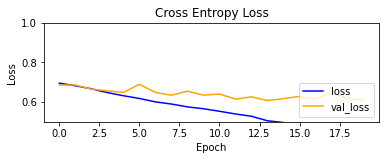

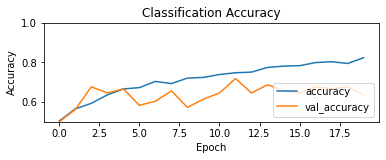

"\nhistory_1 = model_1.fit(train_generator_m1,\n                    steps_per_epoch=step_size_train,\n                    validation_data=validation_generator_m1,\n                    validation_steps=step_size_valid,\n                    epochs=20)\n_, acc = model_1.evaluate(validation_generator_m1, steps=len(validation_generator_m1), verbose=0)\nprint('> %.3f' % (acc * 100.0)) # validation accuracy 71.28%\nsummarize_diagnostics(history_1)\n"

In [ ]:
epoch=20
model_train_validate(model_1,train_generator_m1,validation_generator_m1,step_size_train,step_size_valid,epoch) # model train and validation

Validation accuracy of around 64% was obtained with the first model. It was observed that although loss decreased after each epoch, validation loss started increasing slightly after 10 epochs showing the presence of overfitting. Also validation accuracy did not have any major improvements throught the run.

## **Second Model**

In [ ]:
model_2 = create_second_model(img_wid,img_height,img_channel)
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 350, 350, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 175, 175, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 87, 87, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 43, 43, 128)     

Epoch 1/20
112/112 [==============================] - 15s 113ms/step - loss: 0.7835 - acc: 0.5745 - val_loss: 0.7351 - val_acc: 0.5104
Epoch 2/20
112/112 [==============================] - 12s 108ms/step - loss: 0.4298 - acc: 0.8119 - val_loss: 0.6713 - val_acc: 0.6875
Epoch 3/20
112/112 [==============================] - 13s 112ms/step - loss: 0.3142 - acc: 0.8701 - val_loss: 0.6539 - val_acc: 0.6458
Epoch 4/20
112/112 [==============================] - 12s 107ms/step - loss: 0.2256 - acc: 0.9295 - val_loss: 0.6803 - val_acc: 0.5938
Epoch 5/20
112/112 [==============================] - 12s 109ms/step - loss: 0.2004 - acc: 0.9250 - val_loss: 0.6172 - val_acc: 0.6562
Epoch 6/20
112/112 [==============================] - 12s 108ms/step - loss: 0.1403 - acc: 0.9608 - val_loss: 0.6549 - val_acc: 0.6458
Epoch 7/20
112/112 [==============================] - 12s 108ms/step - loss: 0.1395 - acc: 0.9574 - val_loss: 0.7410 - val_acc: 0.6458
Epoch 8/20
112/112 [==============================] - 1

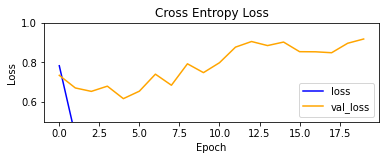

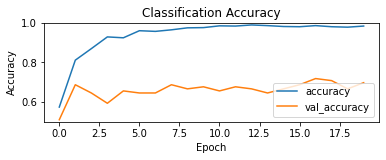

In [ ]:
epoch=20
model_train_validate(model_2,train_generator_m1,validation_generator_m1,step_size_train,step_size_valid,epoch) # model train and validation

An aacuracy of around 66% was obtained with second model. But it was observed that validation loss became really high with no improvements in validation accuracy. The training data accuracy was really high because the model is learning too much from traning data and it is picking up noise. All these points to the fact that the model suffers from severe overfitting. Even using techniques like BatchNormalization and Dropout did not yield better results. Neural networks usually require large amount of data to be trained. As the number of images for traning is less using a complicated model can yield in poorer results. To investigate further image augmentation is perfomred so that the model gets more data points for training.

# **Image Augmentation**
Nural networks require huge amount of data to generate great results. It is because the model learns patterns by itself from data without much manual intervention. Hence the previous models does provide much improvement from classical machine learning model such as SVM. As mentioned earlier image augmentation is done below to generate more data points to train the model. Such augmentatiions help in the classification of such zoomed in or flipped images comes in testing data that is not present in the traning set.Following parameters are specified im imagedatagenerator to augment images

*   rotation_range - A value in degrees(0-180) a range to rotate pictures
*   width_shift and height_shift - Ranges (as a fraction of total width or
height) within which pictures are randomly shifted vertically and horizontally
*   shear_range - For randomly applying shearing transformations
*   zoom_range - For randomly zooming inside pictures.
*   horizontal_flip - For randomly flipping half the images horizontally
There are other techniques such as fill mode(filling in newly created pixels), vertical flip etc

In [11]:
train_imgdatagen2 = ImageDataGenerator(rescale = 1./255,
                     rotation_range = 15,
                     width_shift_range = 0.1,
                     height_shift_range = 0.1,
                     shear_range = 0.1,
                     zoom_range = 0.2,
                     horizontal_flip = True
                     )
train_generator_m2 = train_imgdatagen2.flow_from_dataframe(
                    train_df,
                    "/content/drive/My Drive/ML_Assignment/Project2_files/data/train/", 
                    x_col='Name',
                    y_col='Category',
                    target_size = (350, 350), # resize image to 150x150
                    batch_size = 8,
                    shuffle= True,
                    seed=42,   
                    class_mode = 'binary'
                  )
step_size_train_aug=train_generator_m2.n//train_generator_m2.batch_size

Found 901 validated image filenames belonging to 2 classes.


### **Model 1 with Augmentation**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 128)      0

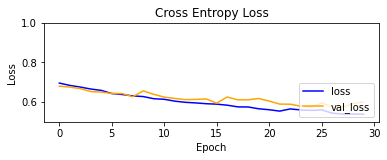

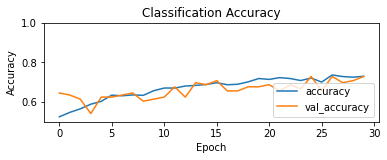

In [12]:
model_1_Aug = create_first_model(img_wid,img_height,img_channel)
model_1_Aug.summary()
epoch=30 # increasing epochs did not improve accuracy significantly after this
model_train_validate(model_1_Aug,train_generator_m2,validation_generator_m1,step_size_train_aug,step_size_valid,epoch) # model train and validation

Model 1 has performed significantly better with image augmentation. It has produced a validation accuracy of around 73%. Also as the epochs increased both training loss and validation loss came down while both training and validation accuracy went up. The graphs of loss and accuracy does not show any signs of overfitting. Changing the type of padding parameter to 'same' gave significantly better results. Increasing the epochs to 60 gave a slightly better result. But decision was made to stick with 30 epochs to simplify the traning process and not to overfit the model.

### **Model 2 with Augmentation**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 350, 350, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 175, 175, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 87, 87, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 43, 43, 128)     

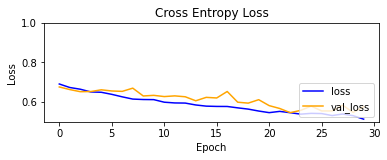

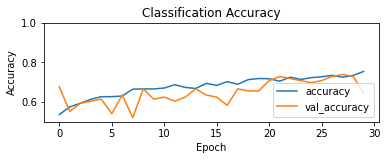

In [ ]:
model_2_Aug = create_first_model(img_wid,img_height,img_channel)
model_2_Aug.summary()
epoch=30 # increasing epochs did not improve accuracy significantly after this
model_train_validate(model_2_Aug,train_generator_m2,validation_generator_m1,step_size_train_aug,step_size_valid,epoch) # model train and validation

Model 2 with image augmentation gave only a validation accuracy of 64%. This is mch poorer than the first model. Cross entropy loss now does not show any signs of overfitting with image augmentation but validation accuracy did not improve. BatchNormalization and Dropout did not give any better results. It was concluded that simpler model(Model 1) works better for this data.

# **Saving Best Model**

In [16]:
# manually created directories saved_model and  my_final_model to save the best model (model 1 with image augmentation)
model_1_Aug.save('/content/drive/My Drive/ML_Assignment/saved_model/my_final_model') # saving model 1 with image augmentation as best model

INFO:tensorflow:Assets written to: /content/drive/My Drive/ML_Assignment/saved_model/my_final_model/assets


In [4]:
# To load the saved model without re training
# fisrt run cells to import all packages and to connect to google drive. Then run the command below
final_model = tf.keras.models.load_model('/content/drive/My Drive/ML_Assignment/saved_model/my_final_model') # loading final model for predictions with test images

# **Prediction**

Found 100 validated image filenames.
------Output Predictions-------
['Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog']


-----Data Frame with test images and its classes-----
    image Predictions
0  79.jpg         Dog
1  55.jpg         Cat
2  99.jpg         Cat
3  53.jpg         Cat
4  84.jpg         Cat


 Bar plot showing number of test images 

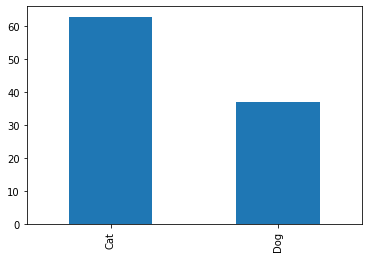

In [9]:
# 100 test images are available for predicting output using the best trained model
test_images = os.listdir('/content/drive/My Drive/ML_Assignment/Project2_files/data/test/')

#creat data frame with test image names
test_df =pd.DataFrame({
    'image': test_images,
})



#prepare generator
test_data_gen  = ImageDataGenerator( rescale = 1./255, )  # Normalizing testing data using ImageDataGenerator. Normalization has to be done on test data as well because traning and validation of model was done on nomalized images
        
testing = test_data_gen.flow_from_dataframe(
      test_df,
      '/content/drive/My Drive/ML_Assignment/Project2_files/data/test/',
      x_col='image',
      y_col= None,
      target_size=(350,350),
      class_mode=None,
      shuffle=False, 
      batch_size=1
      )
# since sigmoid was given as the final function, predicted output will be a probability
predections = final_model.predict(testing) # array of predicted probabilities for test images 
pred = ['Dog' if p > 0.5 else 'Cat' for p in predections] # values over 0.5 belongs to class 1 or Dog. values less than 0.5 belongs to class 0 or Cat
test_df['Predictions']=pred # A new column is created with predicted classes cat or Dog and it is appended to the corresponding test image names in the data frame

print("------Output Predictions-------")
print(pred)
print("\n")
print("-----Data Frame with test images and its classes-----")
print(test_df.head())
print("\n")
test_dict = dict(zip(test_df.image, test_df.Predictions)) # converting data frame columns to a dictionary to further display images. Key as image name value as class
print(" Bar plot showing number of test images classified as Cat or Dog")
test_df['Predictions'].value_counts().plot.bar()

In [26]:
# A function to diplay test images along with its predicted classes
def plot_predection():
    plt.figure(figsize=(20,15)) # plotting figure size for display
    plt.suptitle("Predection  Images", fontsize=20)
    images = [] 
    path ='/content/drive/My Drive/ML_Assignment/Project2_files/data/test/'
    count = 0  
    for i,files in enumerate(os.listdir(path)) : # iterating over all image files while tracking number of iterations
        img = plt.imread(path+files) #reading image
        img = cv2.resize(img,(350,350)) # resizing to required size
        plt.imshow(img,cmap=plt.cm.binary) # displaying image
        pred=test_dict[files] # using the dictionary created earlier to get target class from image name
        plt.subplot(5,7,i+1) # 5 rows 7 columns subplot. Using index created in enumerator to plot corresponding images
        plt.xticks([]) # No xticks
        plt.yticks([]) # No yticks
        plt.grid(False) # No grid lines
        plt.xlabel("Predicted "+pred) # displaying target class as label of image
        count += 1
        if count == 35 : # since 5*7 subplots were mentioned earlier
            break 

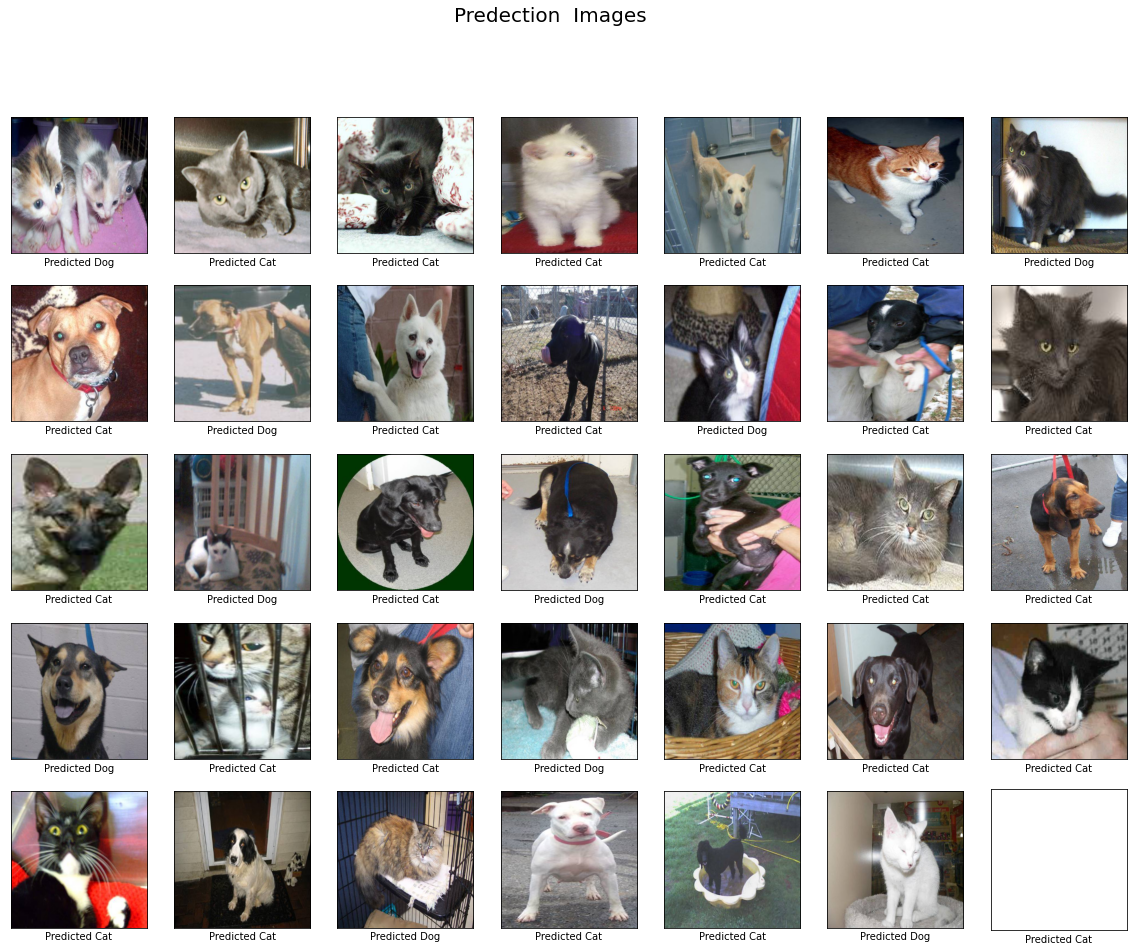

In [27]:
plot_predection()

Although the best model obtained was able to classify test images as Cat or Dog, on manually comparing with ground truth it was observed that the test accuracy was comparitively way lower than traning and validation accuracy. Major reason for this is the lesser number of images available to train the neural network. Image augmentation had taken care of certain level of rotation invaraince (images of cat rotated) and viewpoint invariance. But still the model fails to correctly classify images when there is multiple cats/dogs in same image, occlusions (partially hidden), background clutter, different illuminations, image scale invariance (photograps of dogs taken up-close is different from the ones taken far away) and intra-class inavriance (some breeds of dogs with fur looks like a cat to the algorithm). Wider variety of images can be used to train the model to make it more accurate.